--------------------------------------------------------------------
ER background from materials. 
----------------------------------------------------------------
notebook can be run on the Freiburg cluster or on Dali. 
Change the path of files accordingly.
on dali files are on: /dali/lgrandi/xenonnt/simulations/er_simulations/rootfiles

loading....
server chosen is: /userdata/arocchetti/rootfiles/
2020-05-01
final date for contamination scaling:  2020-05-01
[2.87  2.7   2.518 2.43  2.338]


functions_higher_stats.ipynb:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "output_type": "stream",
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


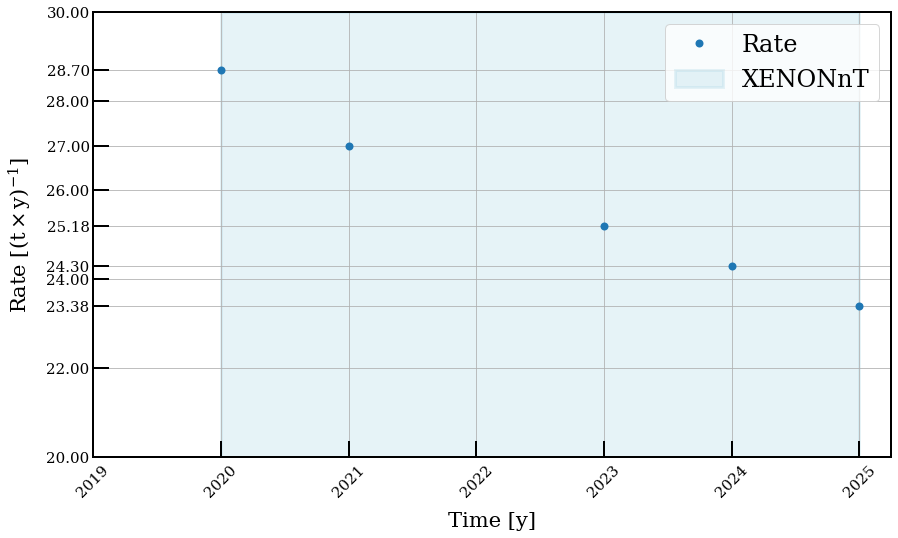

[2.87  2.7   2.518 2.43  2.338]


functions_higher_stats.ipynb:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "server chosen is: /userdata/arocchetti/rootfiles/\n",
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


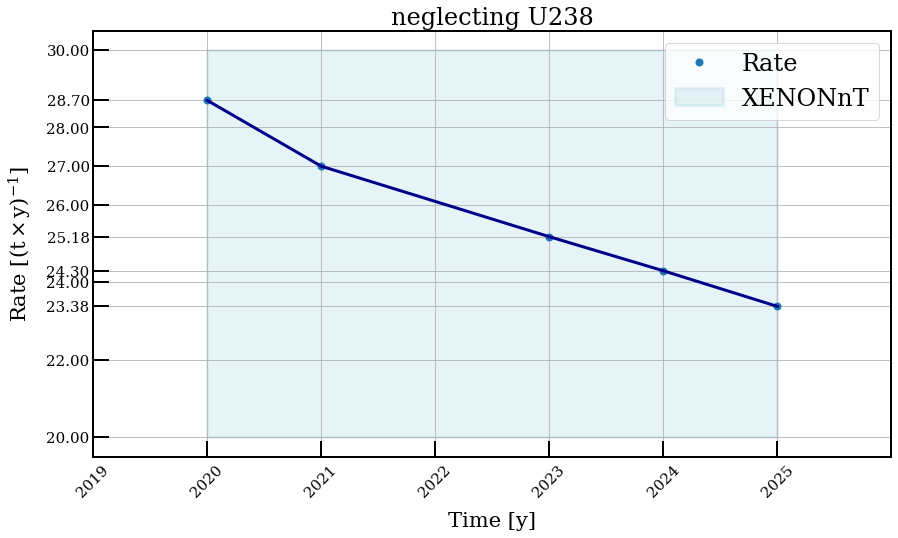

done!


In [19]:
print("loading....")
%run 'init.ipynb'
%run 'geometry_checks.ipynb'
%run 'functions_higher_stats.ipynb'
print("done!")

In [20]:
params = {
    'font.family': 'serif',
    'font.size' : 24, 'axes.titlesize' : 42, 'axes.labelsize' : 32, 'axes.linewidth' : 2,
    # ticks
    'xtick.labelsize' : 24, 'ytick.labelsize' : 24, 'xtick.major.size' : 16, 'xtick.minor.size' : 8,
    'ytick.major.size' : 16, 'ytick.minor.size' : 8, 'xtick.major.width' : 2, 'xtick.minor.width' : 2,
    'ytick.major.width' : 2, 'ytick.minor.width' : 2, 'xtick.direction' : 'in', 'ytick.direction' : 'in',
    # markers
    'lines.markersize' : 12, 'lines.markeredgewidth' : 3, 'errorbar.capsize' : 8, 'lines.linewidth' : 3,
    #'lines.linestyle' : None, 'lines.marker' : None,
    'savefig.bbox' : 'tight', 'legend.fontsize' : 24,
    'axes.labelsize': 21, 'axes.titlesize':24, 'xtick.labelsize':15, 'ytick.labelsize':15,
    'backend': 'Agg', 'mathtext.fontset': 'dejavuserif',
    'figure.facecolor':'w',
    #pad
    'axes.labelpad':12,
    # ticks
    'xtick.major.pad': 6,   'xtick.minor.pad': 6,   
    'ytick.major.pad': 3.5, 'ytick.minor.pad': 3.5,
}
plt.rcParams.update(params)
#%config InlineBackend.figure_formats = {'png', 'retina'}
#matplotlib.rcParams['figure.dpi'] = 300

'''
params = {
    'axes.labelpad':12,
    # ticks
    'xtick.major.pad': 6,   'xtick.minor.pad': 6,   
    'ytick.major.pad': 3.5, 'ytick.minor.pad': 3.5,
    # colormap
    #'image.cmap':'viridis','summer'
    #'image.cmap':'jet',
}
plt.rcParams.update(params)
plt.close()
''';

In [12]:
#list of components and isotopes used in this analysis.

components = ["PmtTpc",
             "OuterCryostat_Elongation",
             "OuterCryostatShell", 
             "OuterCryostat_flanges",
             "SS_InnerCryostatShell",
             "SS_InnerCryostatFlanges",
             "SS_InnerCryostat_bottomDome",
             "SS_BellPlate",
             "SS_BellSideWall"
             "SS_BellSideWallBottomLip",
             "Teflon_Pillar_",#includes also pfte frame (Lxe + Gxe part)
             "SS_AnodeRing", #anode + all the electrodes 
             "Teflon_TPC_Sliding", #material is Teflon_TPC used twice for sliding and fixed
             "Teflon_TPC_Fixed",
             "Teflon_BottomTPC",
             "Copper_TopRing", #includes also bottom ring
             "Copper_FieldGuard_",
              "Copper_FieldShaperRing_",
              "Copper_BottomPmtPlate" #includes also top ring
             ]

isotope_array = ["U238",
                "Co60",
                "K40",
                "Cs137",
                "Th228",
                "U235",
                "Th232",
                "Ra226"
                ]

In [21]:
m_fv = 4
components = ["PmtBases"]
def print_results(m_fv):
    total_rate = []
    times = []
    print("^material ^", isotope_array[0], "^", isotope_array[1], "^", isotope_array[2], "^",isotope_array[3], "^", isotope_array[4],"^",
             isotope_array[5], "^",isotope_array[6], "^",isotope_array[7], "^ Tot ^", )
    for component in components:
        tot_rate_per_comp, time = do(component, m_fv)
        total_rate = np.append(total_rate, tot_rate_per_comp)
    print("^Tot.^^^^^^^^^", "%4.4f" %(sum(total_rate)), "ev/t*y^")     

print_results(m_fv) 


^material ^ U238 ^ Co60 ^ K40 ^ Cs137 ^ Th228 ^ U235 ^ Th232 ^ Ra226 ^ Tot ^


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
#Cell calculates the rate for the Cryostats
m_fv = 4
components = [
             "OuterCryostat_Elongation",
             "OuterCryostatShell", 
             "OuterCryostat_flanges",
             "SS_InnerCryostatShell",
             "SS_InnerCryostatFlanges",
             "SS_InnerCryostat_bottomDome",
             ]

#function to return the rates nicely formatted
def print_results(m_fv):
    total_rate = []
    times = []
    print("^material ^", isotope_array[0], "^", isotope_array[1], "^", isotope_array[2], "^",isotope_array[3], "^", isotope_array[4],"^",
             isotope_array[5], "^",isotope_array[6], "^",isotope_array[7], "^ Tot ^", )
    for component in components:
        tot_rate_per_comp, time = do(component, m_fv)
        total_rate = np.append(total_rate, tot_rate_per_comp)
    print("^Tot.^^^^^^^^^", "%4.4f" %(sum(total_rate)), "ev/t*y^")     

print_results(m_fv) 


^material ^ U238 ^ Co60 ^ K40 ^ Cs137 ^ Th228 ^ U235 ^ Th232 ^ Ra226 ^ Tot ^


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
#----------BELL----------------
components = [
             "SS_BellPlate",
             "SS_BellSideWall",
             "SS_BellSideWallBottomLip",
             ]

#function to return the rates nicely formatted
def print_results(m_fv):
    total_rate = []
    times = []
    print("^material ^", isotope_array[0], "^", isotope_array[1], "^", isotope_array[2], "^",isotope_array[3], "^", isotope_array[4],"^",
             isotope_array[5], "^",isotope_array[6], "^",isotope_array[7], "^ Tot ^", )
    for component in components:
        tot_rate_per_comp, time = do(component, m_fv)
        total_rate = np.append(total_rate, tot_rate_per_comp)

    print("^Tot.^^^^^^^^^", "%4.4f" %(sum(total_rate)), "ev/t*y^")     

print_results(m_fv) 

In [ ]:
### -----------Teflon ----------------
components = [
             "Teflon_Pillar_",
             "Teflon_TPC_Sliding",
             "Teflon_TPC_Fixed",
             "Teflon_BottomTPC",
             ]

#function to return the rates nicely formatted
def print_results(m_fv):
    total_rate = []
    times = []
    print("^material ^", isotope_array[0], "^", isotope_array[1], "^", isotope_array[2], "^",isotope_array[3], "^", isotope_array[4],"^",
             isotope_array[5], "^",isotope_array[6], "^",isotope_array[7], "^ Tot ^", )
    for component in components:
        tot_rate_per_comp, time = do(component, m_fv)
        total_rate = np.append(total_rate, tot_rate_per_comp)

    print("^Tot.^^^^^^^^^", "%4.4f" %(sum(total_rate)), "ev/t*y^")     

print_results(m_fv) 

In [ ]:
#-----------Copper ----------------
components = [
             "Copper_TopRing",
             "Copper_FieldGuard_",
             "Copper_FieldShaperRing_",
             "Copper_BottomPmtPlate"
             ]


#function to return the rates nicely formatted
def print_results(m_fv):
    total_rate = []
    times = []
    print("^material ^", isotope_array[0], "^", isotope_array[1], "^", isotope_array[2], "^",isotope_array[3], "^", isotope_array[4],"^",
             isotope_array[5], "^",isotope_array[6], "^",isotope_array[7], "^ Tot ^", )
    for component in components:
        tot_rate_per_comp, time = do(component, m_fv)
        total_rate = np.append(total_rate, tot_rate_per_comp)

    print("^Tot.^^^^^^^^^", "%4.4f" %(sum(total_rate)), "ev/t*y^")     

print_results(m_fv) 

In [ ]:
#----------- Others ----------------
components = ["PmtTpc",
             "SS_AnodeRing",
             ]

#function to return the rates nicely formatted
def print_results(m_fv):
    total_rate = []
    times = []
    print("^material ^", isotope_array[0], "^", isotope_array[1], "^", isotope_array[2], "^",isotope_array[3], "^", isotope_array[4],"^",
             isotope_array[5], "^",isotope_array[6], "^",isotope_array[7], "^ Tot ^", )
    for component in components:
        tot_rate_per_comp, time = do(component, m_fv)
        total_rate = np.append(total_rate, tot_rate_per_comp)

    print("^Tot.^^^^^^^^^", "%4.4f" %(sum(total_rate)), "ev/t*y^")     

print_results(m_fv)

In [ ]:
# PLOTS
bins = 250
min_val = 0
max_val = 2500

In [ ]:
#plot cryostat
components = [
             "OuterCryostat_Elongation",
             "OuterCryostatShell", 
             "OuterCryostat_flanges",
             "SS_InnerCryostatShell",
             "SS_InnerCryostatFlanges",
             "SS_InnerCryostat_bottomDome",
             ]
values, bins_plt = plot_total_contribution(bins, min_val, max_val)
make_spectrum(values, "Cryostat", bins, min_val, max_val)

In [ ]:
#plot Bell
components = [
             "SS_BellPlate",
             "SS_BellSideWall",
             "SS_BellSideWallBottomLip",
             ]
values, bins_plt = plot_total_contribution(bins, min_val, max_val )
make_spectrum(values, "Bell", bins, min_val, max_val)

In [ ]:
#plot Teflon
components = [
             "Teflon_Pillar_",
             "Teflon_TPC_Sliding",
             "Teflon_TPC_Fixed",
             "Teflon_BottomTPC",
             ]
values, bins_plt = plot_total_contribution(bins, min_val, max_val )
make_spectrum(values, "Teflon", bins, min_val, max_val)

In [ ]:

#plot Copper
components = [
             "Copper_TopRing", #OK
             "Copper_FieldGuard_", 
             "Copper_FieldShaperRing_",
             "Copper_BottomPmtPlate"
             ]
values, bins_plt = plot_total_contribution(bins, min_val, max_val )
make_spectrum(values, "Copper", bins, min_val, max_val)

In [ ]:
#plot pmt
components = ["PmtTpc"]
values, bins_plt = plot_total_contribution(bins, min_val, max_val )
make_spectrum(values, "pmt", bins, min_val, max_val)

In [ ]:
#plot electrodes
components = ["SS_AnodeRing"]
values, bins_plt = plot_total_contribution(bins, min_val, max_val )
make_spectrum(values, "electrodes", bins, min_val, max_val)

In [ ]:
#-----extra plots-------------

In [ ]:
def load_files(path):

    with open(path+'/Cryostat.json') as json_file:
        cryo = json.load(json_file)
    with open(path+'/Bell.json') as json_file:
        bell = json.load(json_file)   
    with open(path+'/pmt.json') as json_file:
        pmt = json.load(json_file)   
    with open(path+'/Teflon.json') as json_file:
        teflon = json.load(json_file)   
    with open(path+'/Copper.json') as json_file:
        copper = json.load(json_file) 
    with open(path+'/electrodes.json') as json_file:
        electrodes = json.load(json_file) 
    total = np.zeros(len(cryo["map"]))
    for i in range(0, len(cryo["map"])):
        total[i]= cryo["map"][i] + bell["map"][i] + pmt["map"][i]+teflon["map"][i]+copper["map"][i]+electrodes["map"][i]
    
    return total, cryo, bell, pmt, teflon, copper, electrodes
total, cryo, bell, pmt, teflon, copper, electrodes = load_files(".")

In [ ]:
fig = plt.figure(figsize=(9, 7))
n_bins = (max_val-min_val)/bins
bins_plt = np.arange(min_val, max_val, n_bins)

def plot_bello(total, cryo, bell, pmt, teflon, copper, electrodes):
    plt.hist( bins_plt, bins_plt, weights =  cryo["map"],histtype = "step",  label = "Cryostat")
    plt.hist( bins_plt, bins_plt, weights = bell["map"], histtype = "step",label = "Bell")
    plt.hist( bins_plt, bins_plt, weights =  pmt["map"], histtype = "step",label = "Pmts")
    plt.hist( bins_plt, bins_plt, weights =  copper["map"], histtype = "step",label = "Copper")
    plt.hist( bins_plt, bins_plt, weights =  electrodes["map"] , histtype = "step",label = "Electrodes")
    plt.hist( bins_plt, bins_plt, weights =  teflon["map"] ,histtype = "step", label = "Teflon")
    plt.hist( bins_plt, bins_plt, weights =  total, histtype = "step", color = "black", label = "Total")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.yscale("log")
    plt.ylabel("Rate [ev/kg*day*keV]")
    plt.xlabel("Energy [keV]")
    plt.title("ER from materials")
    plt.show()
    plt.tight_layout()
plot_bello(total, cryo, bell, pmt, teflon, copper, electrodes)

In [ ]:
total, cryo, bell, pmt, teflon, copper, electrodes = load_files("spectra_bbf")
total2, cryo2, bell2, pmt2, teflon2, copper2, electrodes2 = load_files(".")

#fig = plt.figure(figsize=(30,30))
plt.hist( bins_plt, bins_plt, weights =  total2, histtype = "step", color = "black", label = "Tot-old")
plt.hist( bins_plt, bins_plt, weights =  total, histtype = "step", color = "red", label = "Tot-new")
plt.legend()
plt.yscale("log")
plt.xlim(0,200)
plt.ylim(1e-6, 1e-4)
plt.show()

In [ ]:

min_val = 0
max_val = 2500
bins = 250
n_bins = (max_val-min_val)/bins
bins_plt = np.arange(min_val, max_val, n_bins)


bin_width = 9
print(bin_width)
print("total: ")
values, bins_, _ = plt.hist( bins_plt, bins_plt, weights =  total, histtype = "step")
print((values[0]*bin_width+values[1])*365*1000) 
print("cryo: ")
values, bins_, _ = plt.hist( bins_plt, bins_plt, weights =  cryo["map"], histtype = "step")
print((values[0]*bin_width+values[1])*365*1000) 
print("bell: ")
values, bins_, _ = plt.hist( bins_plt, bins_plt, weights =  bell["map"], histtype = "step")
print((values[0]*bin_width+values[1])*365*1000)  
print("electrodes: ")
values, bins_, _ = plt.hist( bins_plt, bins_plt, weights =  electrodes["map"], histtype = "step")
print((values[0]*bin_width+values[1])*365*1000)
print("copper: ")
values, bins_, _ = plt.hist( bins_plt, bins_plt, weights =  copper["map"], histtype = "step")
print((values[0]*bin_width+values[1])*365*1000)
print("pmt: ")
values, bins_, _ = plt.hist( bins_plt, bins_plt, weights =  pmt["map"], histtype = "step")
print((values[0]*bin_width+values[1])*365*1000)
print("teflon: ")
values, bins_, _ = plt.hist( bins_plt, bins_plt, weights =  teflon["map"], histtype = "step")
print((values[0]*bin_width+values[1])*365*1000)
plt.yscale("log")
plt.show()



In [ ]:
fig = plt.figure(figsize=(9, 7))
components = ["PmtTpc"]
#isotope_array = ["Ra226", 
                # "Cs137",
                #"Th228",
                #"U235",
                #"Th232",
                #]
###plot spectrum per component 
def plot_spectrum_comp(data, min_,max_, bins_, isotope, time):
    bin_width = ((max_ - min_)/bins_)
    time_weights = (1/time)*(864/40)
    counts, bins = np.histogram(data.Ed, bins = bins_, range = (min_, max_))  
    counts1 = counts*time_weights*(1/bin_width)
    plt.hist(bins[:-1], bins, weights=counts1, label = isotope, histtype = "step")
    plt.ylabel('ev/kg*day*keV')
    plt.xlabel('Ed [keV]')
    plt.yscale('log')
    plt.tight_layout()
    #plt.xlim([0,200])
    #plt.legend(markerscale = 6, bbox_to_anchor=(1.05, 1), loc=2, ncol=2 )
    
for component in components:
    print("working on:" , component)
    p = get_parameters(component)
    for i in range(0, len(isotope_array)):
        isotope = isotope_array[i]
        print(isotope)
        data2, frac, material = get_data(isotope, component)
        data = fv(data2)
        N_ = number_of_events(material)
        N = N_[isotope]
        b = select_typepri(isotope) #later on with the good function
        n =  N*(frac/100)*(1/b) #n_gen * fraction in that component * chain_factor
        p = get_parameters(component)
        mass = p['mass']
        contamination = p[isotope] 
        if contamination > 0:
            contamination = p[isotope]/1000 
            time = n / (mass * contamination)
        else:          
            print("no contamination")
            continue
        
        plot_spectrum_comp(data, 0, 2500, 550, isotope, time)
        
        plt.xlim([0,100])
    plt.hist( bins_plt, bins_plt, weights =  pmt["map"], histtype = "step", label = "Total", color = "Black")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    

In [ ]:

fig = plt.figure(figsize=(15, 15))
labels = ["U238", "Co60", "K40", "Cs137", "Th228", "U235", "Th232", "Ra226" ]

sizes = [0.77, 10.85, 1.04, 0.72, 0.40, 0.13, 0.13 , 11.30 ]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

explode = [ 0, 0.3, 0.3, 0.3 ,0.4 , 0.5 ,0.5 ,0]
# colors = ['#4477AA', '#66CCEE', '#228833', '#CCBB44', '#EE6677', '#AA3377', "37AFA9" ]
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
counts = pd.Series([10.85, 0.77 ,1.04, 0.72, 0.40, 0.13, 0.13 , 11.30], 
                   index=["Co60", "U238", "K40", "Cs137", "Th228", "U235", "Th232", "Ra226" ])

counts.plot(kind='pie', fontsize=16, colors=colors, 
            explode=explode, autopct='%0.1f%%', pctdistance=0.9)
plt.axis('equal')
plt.ylabel('')
plt.legend(labels=counts.index, loc="best")
plt.show()







In [ ]:
fig, ax = plt.subplots(figsize=(24, 12), subplot_kw=dict(aspect="equal"))
theme = plt.get_cmap('viridis')
recipe = ['Cryostat','Electrodes', 'Pmts','Teflon', 'Bell', 'Copper',  ]

data = [38, 0.01, 15,0.08, 2.15, 0.28 , ]#check these numbers 

wedges, texts, _ = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, autopct='%0.1f%%')

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
colors = ['#4477AA', '#66CCEE', '#228833', '#CCBB44', '#EE6677', '#AA3377']

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw, fontsize =17,  
               )

ax.set_title("ER background - Materials",fontsize =17 )

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(24, 12), subplot_kw=dict(aspect="equal"))
theme = plt.get_cmap('viridis')
recipe = ['Cryostat', 'Pmts', 'Bell', 'Copper + Teflon + Electrodes',  ]

data = [24.88, 15, 1.68, 0.28+0.001+0.1 , ]

wedges, texts, perc = ax.pie(data, wedgeprops=dict(width=0.7), startangle=-40, autopct='%0.1f%%')

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
colors = ['#4477AA', '#66CCEE', '#228833', '#CCBB44', '#EE6677', '#AA3377']
for i in perc:
    i.set_fontsize(15)


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw, fontsize =17,  
               )

ax.set_title("ER background - Materials",fontsize =17 )
plt.tight_layout()
plt.show()

In [ ]:
%run 'init.ipynb'
dates =       [2015, 2016, 2020  , 2021,   2022,  2023,  2024,  2025]
# dates = [15, 16, 20, 21,22,23,24,25]
data_points = [55,   50.7, 43.74 , 41.29, 39.34, 37.61,  36.08, 34.08]
dates = np.asarray(dates)
data_points= np.asarray(data_points)

In [ ]:
# fig, ax = plt.subplots()
dates =       [ 2020  , 2021,   2022,  2023,  2024,  2025]
data_points = [ 42.02 , 39.78, 38.04, 36.46,  35.07, 33.91]

dates = np.asarray(dates)
data_points= np.asarray(data_points)

err_datapoints = []

for i in range(0, len(data_points)):
    err_datapoints = np.append(err_datapoints, data_points[i]*0.1)
    
print(err_datapoints)
plt.figure(figsize=(13,8))
ax = plt.plot(dates, data_points, ".", label="Rate", markersize = 10)
axes= plt.axes()
plt.xticks(rotation = 45)
ticks = [ 50.00, 42.02 , 39.78, 38.04, 36.46,  35.07, 33.91, 30]
axes.set_yticks(ticks)
plt.xlabel("Time [y]")
plt.ylabel(r"Rate [(t$\,$$\times$$\,$y)$^{-1}$]")

xticks = np.arange(2019, 2026, 1)
axes.set_xticks(xticks) 
axes.grid()

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((2020, 30), 5, 20, angle=0.0, alpha =0.3, color = "lightblue", linewidth=3, label = "XENONnT"))

plt.legend()
plt.tight_layout()

x = dates
y = data_points
z = np.polyfit(x, y, 8)
f = np.poly1d(z)  
plt.plot(x, f(x), color="DarkBlue")
plt.xlim(2019, 2026)
plt.show()


In [ ]:

# # Scientific libraries
# import numpy as np
# from scipy.optimize import curve_fit


# y = data_points
# x = dates

# def exponenial_func(x, a, b):
#     return a*np.exp(-b*x)

# guess = (2.75e-4, 1984)
# popt, pcov = curve_fit(exponenial_func, x, y , guess)# bounds=(0, [1., 1., 0.5]))
                      
# ax = plt.plot(dates, data_points, '.',label="Data", markersize = 7)
# plt.plot(x, exponenial_func(x, *popt))
# print(popt)


In [ ]:
# Only for flanges 
dates =       [2015 , 2020 , 2021 , 2022 , 2023 , 2024 , 2025    ]
data_points = [19.27, 14.38, 13.70, 13.14, 12.65, 12.22, 11.84  ]

In [ ]:
import matplotlib.patches as patches
from matplotlib.patches import Rectangle



plt.figure(figsize=(13,8))
ax = plt.plot(dates, data_points, '.',label="", markersize = 10)



axes= plt.axes()
tics =[19.27, 19, 18, 17, 16,15, 14.38, 13.70, 13.14, 12.65, 12.22, 11.84  ]
axes.set_yticks(tics)
plt.xlabel("Time [y]")
plt.ylabel(r"Rate [(t$\,$$\times$$\,$y)$^{-1}$]")

xticks = np.arange(2014, 2026, 1)
axes.set_xticks(xticks) 

axes.grid()


currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((2015, 10), 3, 10, angle=0.0, alpha =0.5, color = "pink", linewidth=3, label = "XENON1T"))
currentAxis.add_patch(Rectangle((2018, 10), 2, 10, angle=0.0, alpha =0.5, color = "lightblue", linewidth=3, label = "Shutdown"))
currentAxis.add_patch(Rectangle((2020, 10), 5, 10, angle=0.0, alpha =0.5, color = "lightgreen", linewidth=3, label = "XENONnT"))
# plt.ylim(0, 60)
#plt.xlim(2013, 2027)
plt.tight_layout()
plt.legend()
plt.title("RATE FOR CRYOSTAT FLANGES")
plt.show()


# plt.plot(dates,f(dates), markersize = 2, color='red',label="Polyfit with %d degrees  " %degree_of_fit)
#

In [ ]:
# Scientific libraries
import numpy as np
from scipy.optimize import curve_fit

dates = np.asarray(dates)
data_points= np.asarray(data_points)
y = data_points
x = dates

def exponenial_func(x, b):
    return np.exp(-b*x)

guess = (-0.13)
popt, pcov = curve_fit(exponenial_func, x, y ,# guess, # bounds=([0], [1])
                      )
                      
ax = plt.plot(dates, data_points, '.',label="Data", markersize = 7)
plt.plot(x, exponenial_func(x, *popt))
print(popt)

In [ ]:
z = np.polyfit(x, y, 8)
f = np.poly1d(z)  
ax = plt.plot(dates, data_points, '.',label="Data", markersize = 7)
plt.plot(x, f(x))